# **Systemic Crisis Prediction in African Countries**

In this checkpoint, you are to work on the "Systemic Crisis, Banking Crisis, Inflation Crisis In Africa" dataset that was provided by Kaggle.

#### **Dataset description:**
The dataset focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including; Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

The ML model **objective is to predict the likelihood of a Systemic crisis emergence given a set of indicators** like the annual inflation rates.

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, jaccard_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Loading and Previewing the Dataset
df = pd.read_csv("African_crises_dataset.csv")
pd.set_option('display.max_columns', None)

df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [ ]:
# Initial Data Exploration
print(df.shape)

df.info()

(1059, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation

In [ ]:
df.describe(include='all')

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
count,1059.000000,1059,1059,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000,1059
unique,NaN,13,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,EGY,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_crisis
freq,NaN,155,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,965
mean,35.613787,NaN,NaN,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367,NaN
std,23.692402,NaN,NaN,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765,NaN
min,1.000000,NaN,NaN,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000,NaN
25%,15.000000,NaN,NaN,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000,NaN
50%,38.000000,NaN,NaN,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000,NaN
75%,56.000000,NaN,NaN,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000,NaN


In [ ]:
df.isnull().sum()

,0
country_number,0
country_code,0
country,0
year,0
systemic_crisis,0
exch_usd,0
domestic_debt_in_default,0
sovereign_external_debt_default,0
gdp_weighted_default,0
inflation_annual_cpi,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Encoding Categorical Column 'banking_crisis'
df['bank_crisis_encoded'] = df['banking_crisis'].map({'crisis': 1, 'no_crisis': 0})

In [ ]:
# One-Hot Encoding for 'country' Feature
df_encoded = pd.get_dummies(df, columns=['country'], prefix='country')
df_encoded['country'] = df['country']

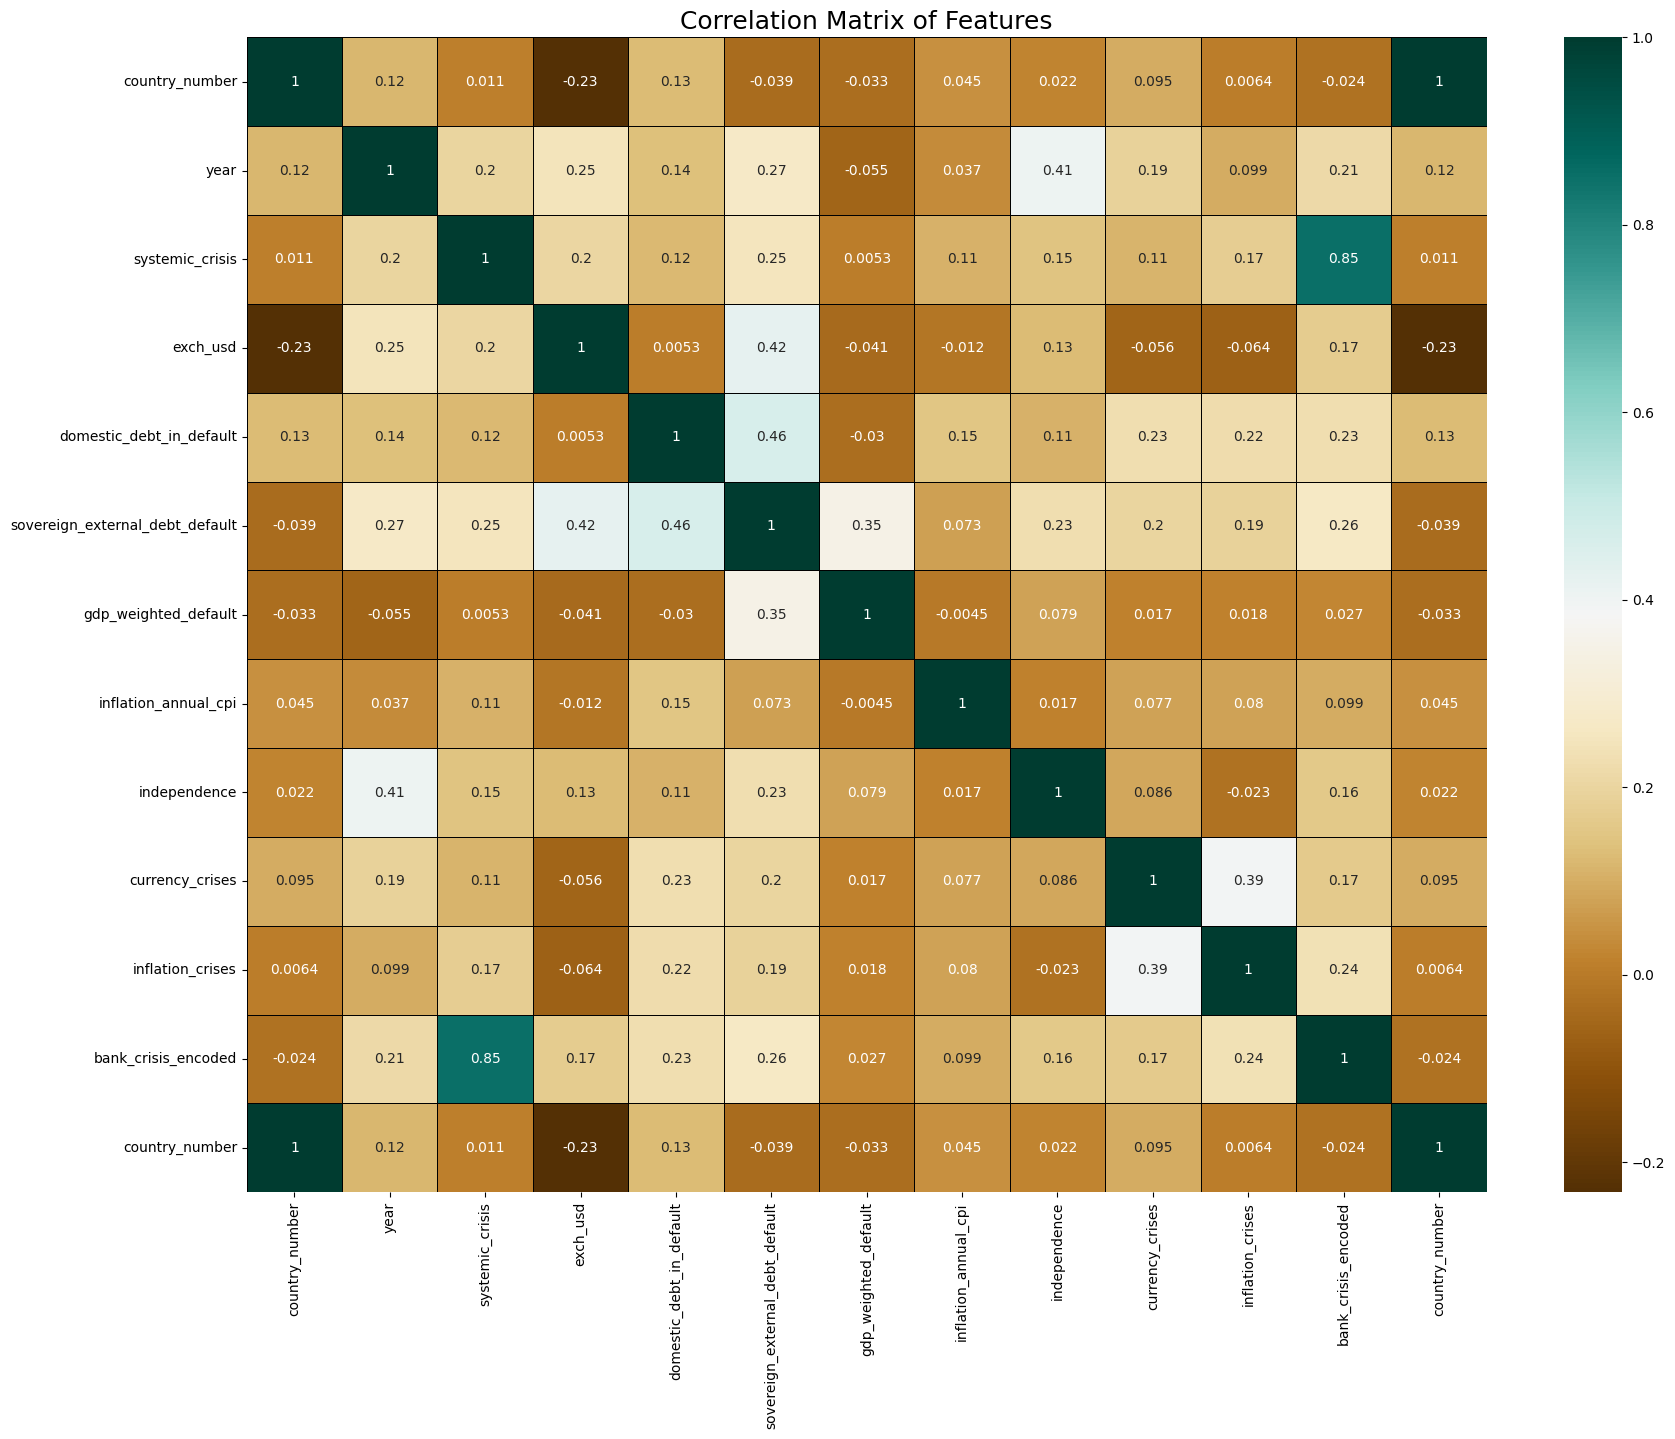

In [ ]:
# Correlation Analysis
selected_columns = ['country_number', 'year', 'systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
                    'sovereign_external_debt_default', 'gdp_weighted_default', 'inflation_annual_cpi',
                    'independence', 'currency_crises', 'inflation_crises', 'bank_crisis_encoded'] + \
                   [col for col in df_encoded.columns if col.startswith('country_')]

numeric_cols = df_encoded[selected_columns].select_dtypes(include=[np.number]).columns # To filter only numeric columns to avoid conversion errors
correlation_matrix = df_encoded[numeric_cols].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="BrBG", linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Features', fontsize=18)
plt.show()

In [ ]:
# Feature and Target Selection
X = df_encoded.drop(columns=["systemic_crisis", "gdp_weighted_default", "country_code",
                             "country_number", "country", "banking_crisis"], errors='ignore')
y = df_encoded["systemic_crisis"]

In [ ]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Final KNN Model (Best K Found Visually)
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       195
           1       0.57      0.24      0.33        17

    accuracy                           0.92       212
   macro avg       0.75      0.61      0.65       212
weighted avg       0.91      0.92      0.91       212



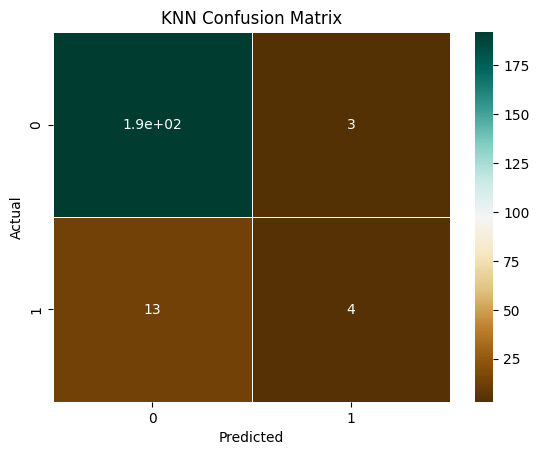

In [ ]:
# Confusion Matrix for KNN
sns.heatmap(pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], colnames=['Predicted']),
            annot=True, cmap="BrBG", linewidths=0.5)
plt.title('KNN Confusion Matrix')
plt.show()

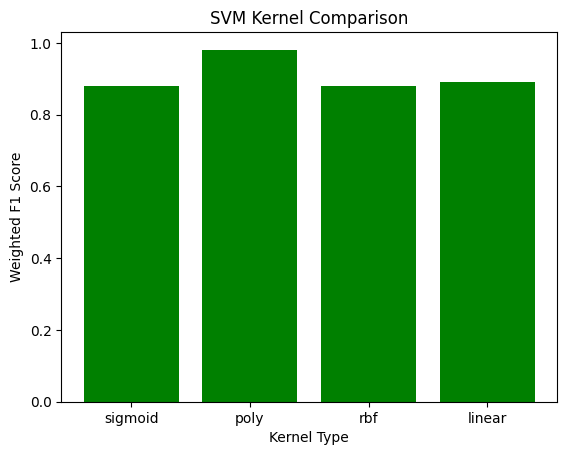

In [ ]:
# SVM Kernel Comparison
kernels = ['sigmoid', 'poly', 'rbf', 'linear']
k_scores = []

for kernel in kernels:
    model = SVC(C=0.01, gamma='auto', kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    k_scores.append(f1_score(y_test, y_pred, average='weighted'))

plt.bar(kernels, k_scores, color='green')
plt.xlabel('Kernel Type')
plt.ylabel('Weighted F1 Score')
plt.title('SVM Kernel Comparison')
plt.show()

In [ ]:
# Final SVM Model
svc_model = SVC(C=0.01, gamma='auto', kernel='poly')
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svc))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       195
           1       0.88      0.88      0.88        17

    accuracy                           0.98       212
   macro avg       0.94      0.94      0.94       212
weighted avg       0.98      0.98      0.98       212



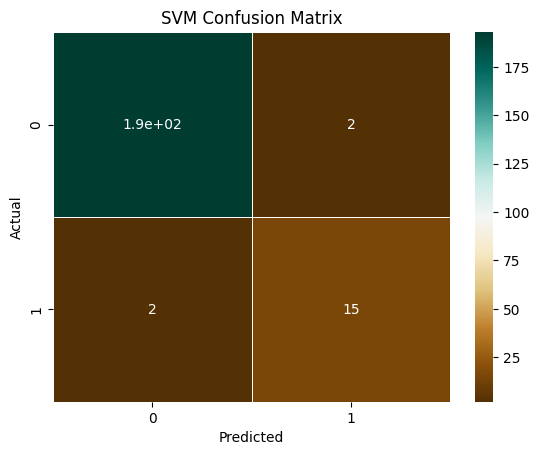

In [ ]:
# SVM Confusion Matrix
sns.heatmap(pd.crosstab(y_test, y_pred_svc, rownames=['Actual'], colnames=['Predicted']),
            annot=True, cmap="BrBG", linewidths=0.5)
plt.title('SVM Confusion Matrix')
plt.show()

In [ ]:
# Decision Tree Tuning
depths = range(1, 10)
jaccard_scores, f1_scores = [], []
for d in depths:
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    jaccard_scores.append(jaccard_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

result = pd.DataFrame({'Jaccard': jaccard_scores, 'F1': f1_scores},
                      index=[f'd = {i}' for i in depths])
print("Decision Tree Depth Evaluation:\n", result)

Decision Tree Depth Evaluation:
         Jaccard        F1
d = 1  0.842105  0.986033
d = 2  0.941176  0.995218
d = 3  0.833333  0.985653
d = 4  0.894737  0.990804
d = 5  0.894737  0.990804
d = 6  0.894737  0.990804
d = 7  0.842105  0.986033
d = 8  0.894737  0.990804
d = 9  0.894737  0.990804


In [ ]:
# Final Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=2)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       195
           1       1.00      0.94      0.97        17

    accuracy                           1.00       212
   macro avg       1.00      0.97      0.98       212
weighted avg       1.00      1.00      1.00       212



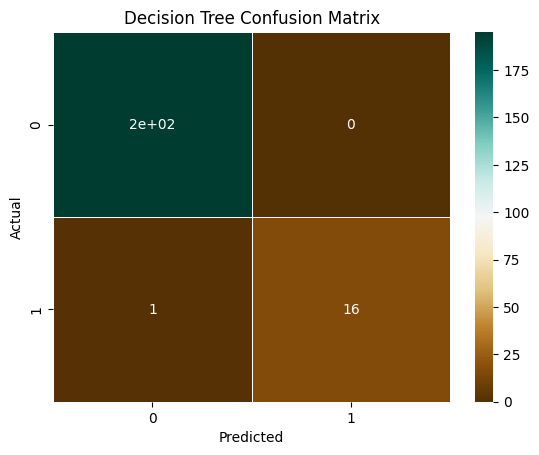

In [ ]:
# Decision Tree Confusion Matrix
sns.heatmap(pd.crosstab(y_test, y_pred_dt, rownames=['Actual'], colnames=['Predicted']),
            annot=True, cmap="BrBG", linewidths=0.5)
plt.title('Decision Tree Confusion Matrix')
plt.show()

# **Key Insights**

1. **K-Nearest Neighbors (KNN)**: has an **accuracy of 92%**. But, it severely underperforms on minority class 1 (crisis events) with only 24% recall and 33% F1-score, indicating poor detection of actual crisis instances.
The model may be biased toward the majority class, failing in imbalanced datasets which is a typical behavior of KNN without proper preprocessing.

2. **Support Vector Machine (SVM)**: has an **accuracy of 98%**. It also shows strong performance across both classes (88% precision and recall on the crisis class).
The SVM model can be said to generalize well even with class imbalance, providing a strong baseline for linear or non-linear separation.

3. **Decision Tree (max depth=2)**: has **100% accuracy**. It shows exceptional performance on both classes (F1-scores ≈ 1.00 for class 0 and 0.97 for class 1).
While its results are impressive, perfect accuracy with simple depth may signal overfitting or data leakage.


# **Improvement Recommendations**

- Class imbalance can be addressed by evaluating model performance with balanced accuracy and AUC-ROC, and not just accuracy.

- The Decision Tree performance can be validated using cross-validation to confirm that 100% accuracy isn't due to overfitting. The max depth can be increased, and the tree pruned to find an optimal generalization depth.

- Feature engineering & selection can be done by applying PCA to reduce multicollinearity from the one-hot encoded country data. Economic features can also be aggregated into indexes or trends over time.

- Random Forest and Gradient Boosting (XGBoost, LightGBM) can also be tried as they are more robust with imbalanced and structured data.